# INFO 4390/5390 / CS 5382 Phase 2 Submission
Bin Jang (bj225), Divya Akkiraju (dma232), Likita Gangireddy (lg425), Wei Yang (wy233) 

## 1. Data imports & data cleaning

Codebook citation: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [2]:
#import data and display brief
data = pd.read_csv('2015.csv')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [3]:
#Drop factors with less than 50% data present
percent_data_present = data.count()/data.shape[0]
drop_feature = percent_data_present.where(percent_data_present<0.5).dropna()
data = data.drop(columns = drop_feature.index.to_list())
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
df = data
#Drop all non float features for training model
df = data.select_dtypes(include=['float64'])
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
#Drop all variables for evaluation(Gender) #SEX #SXORIENT, TRNSGNDRnot exist but could be calculated
df = df.drop(columns=['SEX'])

#Drop all variables for evaluation(income) #_INCOMG
df = df.drop(columns=['INCOME2','_INCOMG'])

#Drop all variables for evaluation(Race) #_RACE
df = df.drop(columns=['_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1'])

In [6]:
#Drop all related outcome variables(Healthcare) related # 'HLTHPLN1 '
df = df.drop(columns=['PERSDOC2','MEDCOST','CHECKUP1'])
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,STATERES,CELLFON3,NUMADULT,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,3.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
2,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,3.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
#true outcome variable
df['HLTHPLN1'] = data['HLTHPLN1']

#Drop all outcome variables that are NA(7(Don’t know/Not Sure), 9(Refused))
df = df[(df['HLTHPLN1'] != 7) & (df['HLTHPLN1'] != 9)]
data = data[(data['HLTHPLN1'] != 7) & (data['HLTHPLN1'] != 9)]
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,STATERES,CELLFON3,NUMADULT,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,3.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
2,1.0,1.0,1200.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,2.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,3.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1100.0,2.015000e+09,2.015000e+09,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
#Change healthcare access name for plot (1: Yes, 2: No)
healthcare_mapping = {
    1: "Yes",
    2: "No"
}

data['HLTHPLN1'] = data['HLTHPLN1'].replace(healthcare_mapping)
data['HLTHPLN1'].value_counts()

HLTHPLN1
Yes    407556
No      32060
Name: count, dtype: int64

In [9]:
#Change gender name for plot (1: Male, 2: Female)
gender_mapping = {
    1: "Male",
    2: "Female"
}

data['SEX'] = data['SEX'].replace(gender_mapping)
data['SEX'].value_counts()

SEX
Female    253678
Male      185938
Name: count, dtype: int64

In [10]:
#Change Income name for plot
income_mapping = {
    1: "Less than $15,000",
    2: "$15,000 to less than $25,000",
    3: "$25,000 to less than $35,000",
    4: "$35,000 to less than $50,000",
    5: "$50,000 or more",
    9: "Don’t know/Not sure/Missing"
}

data['_INCOMG'] = data['_INCOMG'].replace(income_mapping)
data['_INCOMG'].value_counts()

_INCOMG
$50,000 or more                 173238
Don’t know/Not sure/Missing      78440
$15,000 to less than $25,000     58961
$35,000 to less than $50,000     51958
$25,000 to less than $35,000     39151
Less than $15,000                37868
Name: count, dtype: int64

In [11]:
#Change race name for plot
race_mapping = {
    1: "White only, non-Hispanic",
    2: "Black only, non-Hispanic",
    3: "American Indian or Alaskan Native only, Non-Hispanic",
    4: "Asian only, non-Hispanic",
    5: "Native Hawaiian or other Pacific Islander only, Non-Hispanic",
    6: "Other race only, non-Hispanic",
    7: "Multiracial, non-Hispanic",
    8: "Hispanic",
    9: "Don’t know/Not sure/Refused"
}

data['_RACE'] = data['_RACE'].replace(race_mapping)
data['_RACE'].value_counts()

_RACE
White only, non-Hispanic                                        334925
Hispanic                                                         35574
Black only, non-Hispanic                                         34195
Asian only, non-Hispanic                                          9699
Multiracial, non-Hispanic                                         8119
Don’t know/Not sure/Refused                                       7270
American Indian or Alaskan Native only, Non-Hispanic              6497
Other race only, non-Hispanic                                     1935
Native Hawaiian or other Pacific Islander only, Non-Hispanic      1402
Name: count, dtype: int64

## 2. Summary statistics

### 2.a. Number of Rows and Columns

In [12]:
columns_count = len(data.columns)
rows_count = len(data.index)

print(f"{columns_count = }")
print(f"{rows_count = }")

columns_count = 180
rows_count = 439616


In [13]:
ncols = len(set(data['_RACE']))
print(f"Number of Race subgroups: {ncols}")
print(f"Number of rows for each race:")
data['_RACE'].value_counts()

Number of Race subgroups: 9
Number of rows for each race:


_RACE
White only, non-Hispanic                                        334925
Hispanic                                                         35574
Black only, non-Hispanic                                         34195
Asian only, non-Hispanic                                          9699
Multiracial, non-Hispanic                                         8119
Don’t know/Not sure/Refused                                       7270
American Indian or Alaskan Native only, Non-Hispanic              6497
Other race only, non-Hispanic                                     1935
Native Hawaiian or other Pacific Islander only, Non-Hispanic      1402
Name: count, dtype: int64

In [14]:
ncols = len(set(data['_INCOMG']))
print(f"Number of income level subgroups: {ncols}")
print(f"Number of rows for each income level subgroups:")
data['_INCOMG'].value_counts()

Number of income level subgroups: 6
Number of rows for each income level subgroups:


_INCOMG
$50,000 or more                 173238
Don’t know/Not sure/Missing      78440
$15,000 to less than $25,000     58961
$35,000 to less than $50,000     51958
$25,000 to less than $35,000     39151
Less than $15,000                37868
Name: count, dtype: int64

### 2.b. Summary Statistics

In [15]:
# Map labels to binary numbers
data['HLTHPLN1_binary'] = data['HLTHPLN1'].map({'No': 0, 'Yes': 1})

# Compute mean, median, and standard deviation
mean_value = np.mean(data['HLTHPLN1_binary'])
median_value = np.median(data['HLTHPLN1_binary'])
std_deviation = np.std(data['HLTHPLN1_binary'])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 0.9270727180084437
Median: 1.0
Standard Deviation: 0.2600171023853629


In [16]:
races = list(set(data["_RACE"]))
for race in races:
    mean_value = np.mean(data[data["_RACE"] == race]['HLTHPLN1_binary'])
    median_value = np.median(data[data["_RACE"] == race]['HLTHPLN1_binary'])
    std_deviation = np.std(data[data["_RACE"] == race]['HLTHPLN1_binary'])
    
    print(f"Summary Stats for: {race}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_deviation}")
    print()

Summary Stats for: American Indian or Alaskan Native only, Non-Hispanic
Mean: 0.9087271048176081
Median: 1.0
Standard Deviation: 0.2879967947519833
Summary Stats for: White only, non-Hispanic
Mean: 0.9478121967604688
Median: 1.0
Standard Deviation: 0.22240556744956547

Summary Stats for: Native Hawaiian or other Pacific Islander only, Non-Hispanic
Mean: 0.8416547788873039
Median: 1.0
Standard Deviation: 0.3650643944066136

Summary Stats for: Don’t know/Not sure/Refused
Mean: 0.9132049518569464
Median: 1.0
Standard Deviation: 0.28153448769360145

Summary Stats for: Asian only, non-Hispanic
Mean: 0.9192700278379214
Median: 1.0
Standard Deviation: 0.27241997679463337
Summary Stats for: Multiracial, non-Hispanic
Mean: 0.9120581352383298
Median: 1.0
Standard Deviation: 0.2832103338226031

Summary Stats for: Hispanic
Mean: 0.7771406083094394
Median: 1.0
Standard Deviation: 0.41616473087693756

Summary Stats for: Other race only, non-Hispanic
Mean: 0.9028423772609819
Median: 1.0
Standard Devi

In [17]:
incomes = list(set(data["_INCOMG"]))
for income in incomes:
    mean_value = np.mean(data[data["_INCOMG"] == income]['HLTHPLN1_binary'])
    median_value = np.median(data[data["_INCOMG"] == income]['HLTHPLN1_binary'])
    std_deviation = np.std(data[data["_INCOMG"] == income]['HLTHPLN1_binary'])
    
    print(f"Summary Stats for: {income}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_deviation}")
    print()

Summary Stats for: $25,000 to less than $35,000
Mean: 0.9046767643227503
Median: 1.0
Standard Deviation: 0.2936608867678315
Summary Stats for: $15,000 to less than $25,000
Mean: 0.8606197316870474
Median: 1.0
Standard Deviation: 0.34634290683939517

Summary Stats for: Less than $15,000
Mean: 0.8475229745431498
Median: 1.0
Standard Deviation: 0.3594826590597677
Summary Stats for: $35,000 to less than $50,000
Mean: 0.9307517610377612
Median: 1.0
Standard Deviation: 0.25387579711911773
Summary Stats for: Don’t know/Not sure/Missing
Mean: 0.9227180010198878
Median: 1.0
Standard Deviation: 0.2670383710513344
Summary Stats for: $50,000 or more
Mean: 0.9730082314503746
Median: 1.0
Standard Deviation: 0.16205928847242548


### 2.c. Plots and explnations (4 group members, 5 plots)

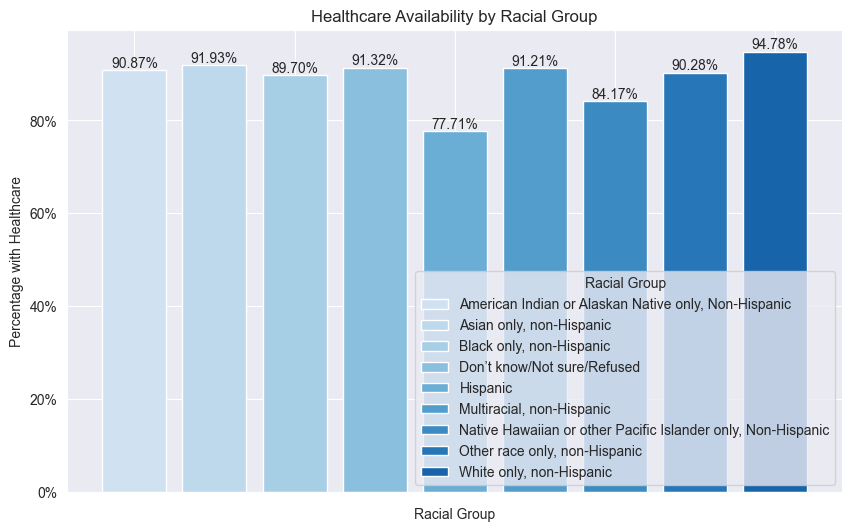

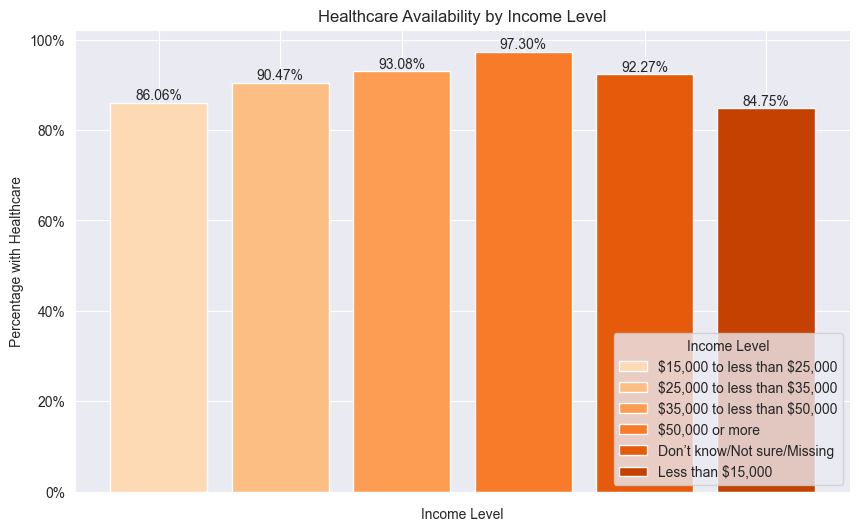

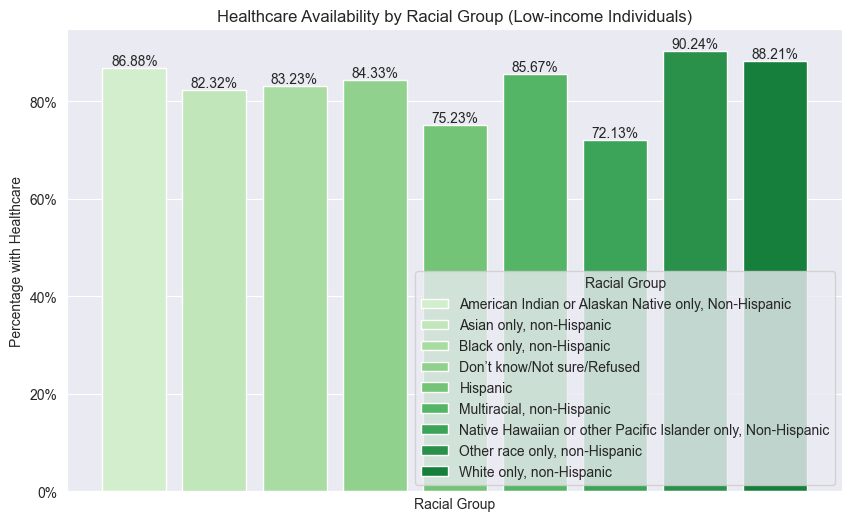

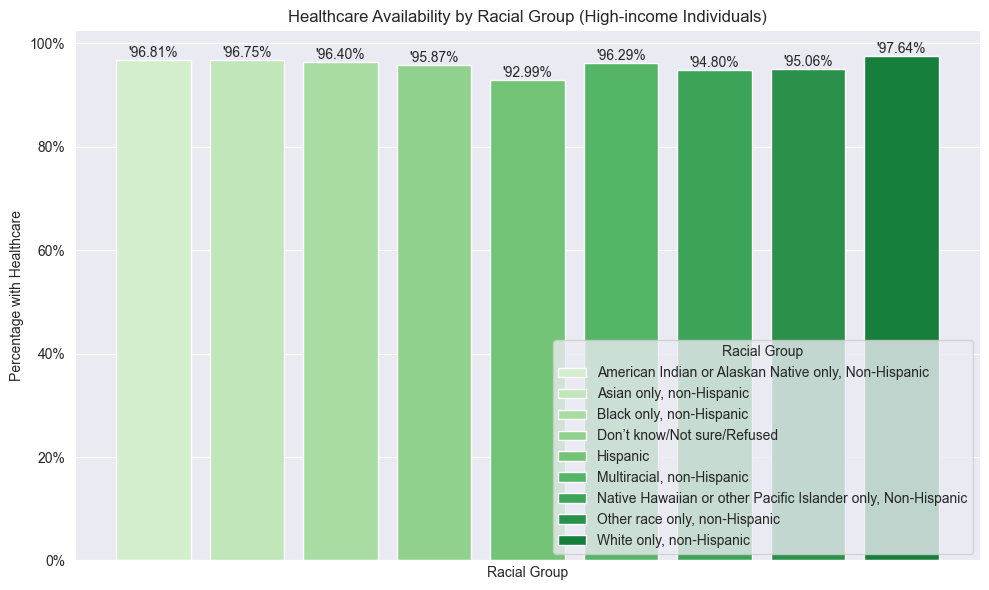

In [18]:
# First plot: Percentage of healthcare availability per racial group
healthcare_by_race = data.groupby('_RACE')['HLTHPLN1'].apply(lambda x: x.str.contains('Yes').mean()).reset_index()
healthcare_by_race.columns = ['Race', 'Healthcare Availability']

# Second plot: Percentage of healthcare availability per income group
healthcare_by_income = data.groupby('_INCOMG')['HLTHPLN1'].apply(lambda x: x.str.contains('Yes').mean()).reset_index()
healthcare_by_income.columns = ['Income Level', 'Healthcare Availability']
# healthcare_by_income['Income Level'] = healthcare_by_income['Income Level'].str.replace(r'\$', r'\$', regex=True)

# Third plot: Percentage of healthcare availability per racial group for low-income individuals
low_income_data = data[data['_INCOMG'] == "Less than $15,000"]  # Assuming 'Low Income' represents low-income level
healthcare_by_race_low_income = low_income_data.groupby('_RACE')['HLTHPLN1'].apply(lambda x: x.str.contains('Yes').mean()).reset_index()
healthcare_by_race_low_income.columns = ['Race', 'Healthcare Availability']

# Fourth plot: Percentage of healthcare availability per racial group for high-income individuals
high_income_data = data[data['_INCOMG'] == "$50,000 or more"]
healthcare_by_race_high_income = high_income_data.groupby('_RACE')['HLTHPLN1'].apply(lambda x: x.str.contains('Yes').mean()).reset_index()
healthcare_by_race_high_income.columns = ['Race', 'Healthcare Availability']


fig1, ax1 = plt.subplots(figsize=(10, 6))
# Plot 1: Healthcare Availability by Racial Group
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(healthcare_by_race['Race'])))
bars = ax1.bar(range(len(healthcare_by_race['Race'])), healthcare_by_race['Healthcare Availability'], color=colors)
ax1.set_xlabel('Racial Group')
ax1.set_ylabel('Percentage with Healthcare')
ax1.set_title('Healthcare Availability by Racial Group')
ax1.set_xticklabels([])
ax1.legend(bars, healthcare_by_race['Race'], title='Racial Group', loc=4)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add percentage counts on top of bars
for i, v in enumerate(healthcare_by_race['Healthcare Availability']):
    ax1.text(i, v, f"{v:.2%}", ha='center', va='bottom')

fig2, ax2 = plt.subplots(figsize=(10, 6))
# Plot 2: Healthcare Availability by Income Level
colors = plt.cm.Oranges(np.linspace(0.2, 0.8, len(healthcare_by_income['Income Level'])))
bars = ax2.bar(range(len(healthcare_by_income['Income Level'])), healthcare_by_income['Healthcare Availability'], color=colors)
ax2.set_xlabel('Income Level')
ax2.set_ylabel('Percentage with Healthcare')
ax2.set_title('Healthcare Availability by Income Level')
ax2.set_xticklabels([])
ax2.legend(bars, healthcare_by_income['Income Level'].str.replace(r'\$', r'\$', regex=True), title='Income Level', loc=4)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add percentage counts on top of bars
for i, v in enumerate(healthcare_by_income['Healthcare Availability']):
    ax2.text(i, v, f"{v:.2%}", ha='center', va='bottom')

fig3, ax3 = plt.subplots(figsize=(10, 6))
# Plot 3: Healthcare Availability for Low-income Individuals by Racial Group
colors = plt.cm.Greens(np.linspace(0.2, 0.8, len(healthcare_by_race_low_income['Race'])))
bars = ax3.bar(range(len(healthcare_by_race_low_income['Race'])), healthcare_by_race_low_income['Healthcare Availability'], color=colors)
ax3.set_xlabel('Racial Group')
ax3.set_ylabel('Percentage with Healthcare')
ax3.set_title('Healthcare Availability by Racial Group (Low-income Individuals)')
ax3.set_xticks([])
ax3.legend(bars, healthcare_by_race_low_income['Race'], title='Racial Group', loc=4)
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for i, v in enumerate(healthcare_by_race_low_income['Healthcare Availability']):
    ax3.text(i, v, f"{v:.2%}", ha='center', va='bottom')

fig4, ax4 = plt.subplots(figsize=(10, 6))
# Plot 4: Healthcare Availability for High-income Individuals by Racial Group
colors = plt.cm.Greens(np.linspace(0.2, 0.8, len(healthcare_by_race_high_income['Race'])))
bars = ax4.bar(range(len(healthcare_by_race_high_income['Race'])), healthcare_by_race_high_income['Healthcare Availability'], color=colors)
ax4.set_xlabel('Racial Group')
ax4.set_ylabel('Percentage with Healthcare')
ax4.set_title('Healthcare Availability by Racial Group (High-income Individuals)')
ax4.set_xticks([])
ax4.legend(bars, healthcare_by_race_high_income['Race'], title='Racial Group', loc=4)
ax4.yaxis.set_major_formatter(mtick.PercentFormatter (1.0))
for i, v in enumerate(healthcare_by_race_high_income['Healthcare Availability']):
    ax4.text (i, v, f"'{v:.2%}", ha='center', va='bottom' )

plt.tight_layout()
plt.show()

The three graphs represent the percentage of people with healthcare insurance, indicating healthcare availability.

- The first graph illustrates healthcare availability for different racial groups.
- The second graph shows healthcare availability for different income groups.
- The third graph focuses on healthcare availability for individuals in the second lowest income group (&#36;15,000 to &#36;25,000) across different racial groups, which essentially represents the intersection of the first two plots. We chose the second lowest income group instead of the lowest, because there weren't enough datapoints in the lowest income group that were hardly overlapping with other socioeconomic categories. 

We observe that the shape of the third graph, which is a subdivision of the first and the second graph, differs significantly from neither plot 1 nor 2. For example:
- The healthcare availability for the Native Hawaiian group is 84.17%.
- The availability for the least income group is 86.06%.
- However, the intersectional group of Native Hawaiians in the &#36;15,000 to &#36;25,000 income range has only 72.13% availability, which is significantly less than either of the two groups.

The third plot hints at intersectional discrimination that we are trying to investigate in our research.

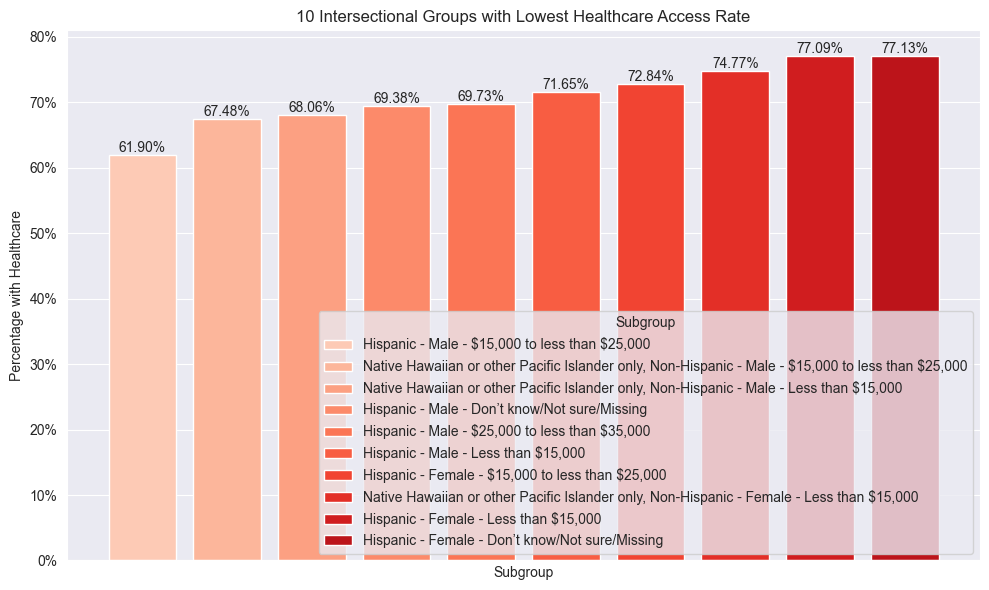

In [19]:
plot_data = data.copy()
plot_data['HLTHPLN1'] = plot_data['HLTHPLN1'].map({'Yes': 1, 'No': 0})
healthcare_access_rate = plot_data.groupby(['_RACE', 'SEX', '_INCOMG'])['HLTHPLN1'].mean().reset_index()
top_10_subgroups = healthcare_access_rate.sort_values(by='HLTHPLN1').head(10)
top_10_subgroups['Subgroup'] = top_10_subgroups['_RACE'].astype(str) + ' - ' + top_10_subgroups['SEX'].astype(str) + ' - ' + top_10_subgroups['_INCOMG'].astype(str).replace(r'\$', r'\$', regex=True)

fig5, ax5 = plt.subplots(figsize=(10, 6))
# Plot 5: Top 10 Subgroups with Lowest Healthcare Access Rate
colors = plt.cm.Reds(np.linspace(0.2, 0.8, len(top_10_subgroups['Subgroup'])))
bars = ax5.bar(range(len(top_10_subgroups['Subgroup'])), top_10_subgroups['HLTHPLN1'], color=colors)
ax5.set_xlabel('Subgroup')
ax5.set_ylabel('Percentage with Healthcare')
ax5.set_title('10 Intersectional Groups with Lowest Healthcare Access Rate')
ax5.set_xticks(range(len(top_10_subgroups['Subgroup'])))
ax5.set_xticks([])
# ax5.set_xticklabels(top_10_subgroups['Subgroup'], rotation=45, ha='right')
ax5.legend(bars, top_10_subgroups['Subgroup'], title='Subgroup', loc=4)
ax5.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for i, v in enumerate(top_10_subgroups['HLTHPLN1']):
    ax5.text(i, v, f"{v:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

To analyze healthcare access disparities across different socioeconomic subgroups, we made a plot showing 10 subgroups with the lowest rates of healthcare access. These subgroups are defined by a combination of race, gender, and income level.
- The subgroup with the lowest average rate of healthcare access, at 62%, is Hispanic Males with an annual income between &#36;15,000 and &#36;24,999.
- It's noteworthy that out of the 10 subgroups with the poorest healthcare access, most are either Hispanic or Native Hawaiian/Other Pacific Islander.
This data highlights significant disparities in healthcare accessibility, especially for those on the intersection between certain racial/ethnic minority groups and lower-income groups, face substantial barriers to receiving adequate medical care, even compared to average of larger minority groups that they belong to.

## 3. Research Question, Hypotheses, and Analysis Plan

For decades, there have existed disparities in access to healthcare insurance for people from varying demographic backgrounds. Acknowledging that these biases exist and understanding their influence (with regard data used to train machine learning models now being employed to assess healthcare insurance access and costs for individuals), we find it critical to expand on findings from existing literature to identify demographic populations who may be most disadvantaged by the employment of these models. To expand on existing findings, we specifically aim to identify intersectional discrimination left unexplored. From findings from existing literature, we understand that people of certain races are disadvantaged against people of other races, people who report a certain income status may be disadvantaged against people who identify as having other income statuses, etc.

We specifically seek to expand on these findings by concerning our project with identifying certain intersections between racial identities and income statuses to see which certain intersectional identities are most disadvantaged (with regard to these two inputs). This leads us to pose the following questions:

(1) With regard to reported racial identities and reported income statuses, which intersectional groups—derived from the intersection of race and reported income—are most disadvantaged in accessing healthcare insurance?

(2) When looking at reported racial identities and reported incomes, which factor more significantly impacts the outcome of an individual’s likelihood of accessing healthcare insurance? 

From our summary statistics, we see that people who identify as Hispanic and Native Hawaiian are most disadvantaged with regard to accessing healthcare insurance. From the “Top 10 Subgroups” bar graph, see that in looking at the intersection of race, income level, and gender, the intersectional demographic groups that have the least access to healthcare are all Hispanic or Native Hawaiian and are all closer to the lower income end of the spectrum of reported incomes. When we look at race and income attributes individually (in the “Healthcare Availability by Racial Group” and “Healthcare Availability by Income” bar graphs), we see that people who identify as Hispanic are most disadvantaged with regard to access to healthcare insurance and people who identify as White are most advantaged. We also see that people who reported low income are most disadvantaged in accessing healthcare insurance and people who reported high income are most advantaged.

When we begin to look at the intersections between race and reported income status and compare the bar graphs, we see that regardless of whether Hispanic people are low income or high income, they have the least access to healthcare insurance whereas White people have the most access to healthcare. However, one thing to note is that the discrepancies in healthcare insurance access rates are much lower for higher-income individuals between racial groups. This leads us to hypothesize that race plays a higher role in impacting the likelihood of an individual receiving healthcare insurance than income status. We also hypothesize that low income Hispanic people are most likely to be disadvantaged with regard to access to healthcare insurance. We will run a KNN classifier, logistic regression, random forest, and Naive Bayes classifier to compare the outputs of these models and test our hypotheses to see if they hold. We will be looking at accuracy deviation from the average for all groups to also see if there are disparities with regard to accuracy of these models for different intersectional groups to tie that into our findings.

## 4. Modeling

In [20]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['SEX'] = label_encoder.fit_transform(data['SEX'])
data['_INCOMG'] = label_encoder.fit_transform(data['_INCOMG'])
data['_RACE'] = label_encoder.fit_transform(data['_RACE'])

# Split data into features and target variable
X = data[['SEX', '_INCOMG', '_RACE']]
y = data['HLTHPLN1'].map({'No': 0, 'Yes': 1})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Model 1: KNN Classifier

In [21]:
# Initialize k-NN classifier
k = 10  # Adjust the value of k as needed
knn_classifier_10 = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier
knn_classifier_10.fit(X_train, y_train)

# Predictions on the test set
y_pred_10 = knn_classifier_10.predict(X_test)

In [22]:
metrics.roc_auc_score(y_test, y_pred_10), metrics.accuracy_score(y_test, y_pred_10)

(0.5186142494785658, 0.9254242300168327)

- To investigate the effect of intersectional discrimination on different socioeconomic groups, we trained a K-Nearest Neighbors (KNN) classifier model. KNN is a non-parametric machine learning algorithm widely used for classification tasks. By training a model on the available data, we aimed to capture the potential patterns of intersectional discrimination based on features like sex, income level, and race.

- To find the optimal value of k (the number of nearest neighbors to consider) for the KNN classifier, we performed a grid search. Grid search is a technique that exhaustively searches through a range of hyperparameter values to identify the combination that yields the best performance metric. In our case, we heuristically determined that a k-value of 10 yielded the highest area under the Receiver Operating Characteristic (ROC-AUC) curve, which was around 0.52.

- On the test set, our model achieved a classification accuracy of approximately 92.5%. This means that the model correctly predicted the healthcare coverage status (yes or no) for 92.5% of the instances in the test set.

- However, it's important to note that training a model that fits the data perfectly, especially in terms of the ROC-AUC metric, was challenging. This could be attributed to the fact that our original dataset contained 330 features, but we narrowed it down to only three features (sex, income level, and race) for this analysis. Reducing the number of features can lead to information loss and potentially limit the model's ability to capture complex patterns.

- Additionally, the target class for the training data (healthcare coverage status) was biased towards "Yes" labels compared to "No" labels. Class imbalance can pose challenges for machine learning models, as they may struggle to learn patterns from the underrepresented class effectively.

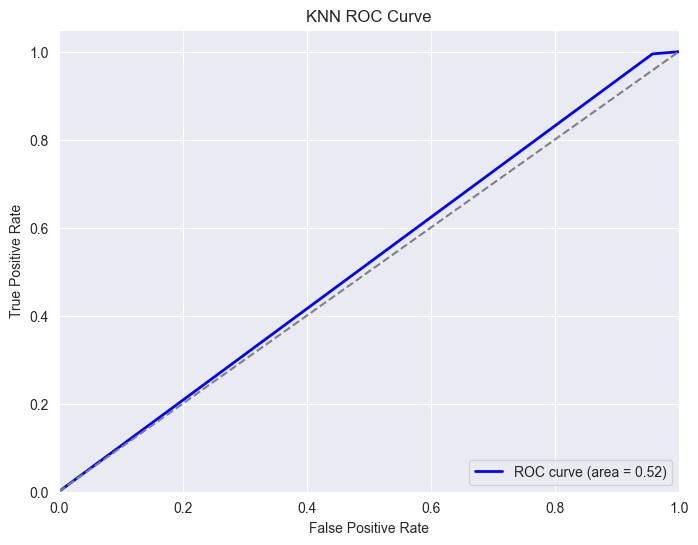

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_10)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

- Next, to investigate the actual intersectional discriminations, we evaluate the test set evaluation accuracy for 4 different subgroups (two racial, two economic) , and also their intersections (6 groups in total)

In [24]:
cond = (X_test["_RACE"] == 6)  # Native Hawaiian
hawaiian_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

cond = (X_test["_INCOMG"] == 0)  # Second lowest income group, because the lowest group had no intersection
low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

cond = (X_test["_RACE"] == 6) & (X_test["_INCOMG"] == 0)  # Intersection of Native Hawaiian & low income
hawaiian_low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

cond = (X_test["_RACE"] == 8)  # White
white_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

cond = (X_test["_INCOMG"] == 3)  # Highest income group
high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

cond = (X_test["_RACE"] == 8) & (X_test["_INCOMG"] == 3)  # Intersection of White & Highest income group
white_high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_10[cond])

overall_average_acc = metrics.accuracy_score(y_test, y_pred_10)
print(f"{overall_average_acc = :.2f}")
print(f"{hawaiian_acc = :.2f}")
print(f"{low_income_acc = :.2f}")
print(f"{hawaiian_low_income_acc = :.2f}")
print(f"{white_high_income_acc = :.2f}")
print(f"{white_acc = :.2f}")
print(f"{high_income_acc = :.2f}")

overall_average_acc = 0.93
hawaiian_acc = 0.81
low_income_acc = 0.85
hawaiian_low_income_acc = 0.72
white_high_income_acc = 0.98
white_acc = 0.95
high_income_acc = 0.97


- We can see that the prediction accuracy for our trained KNN classifier model differs greatly for each of the socioeconomic subgroups.
- In particular, the intersectional group of **Native Hawaiian race** and **Low Income level** group showed a significantly low classification accuracy.
- To gain a deeper insight into this difference, we created a bar plot illustrating the accuracy of each socioeconomic group. We measured the deviation in accuracy (expressed as a percentage increase or decrease) relative to the overall average classification accuracy.

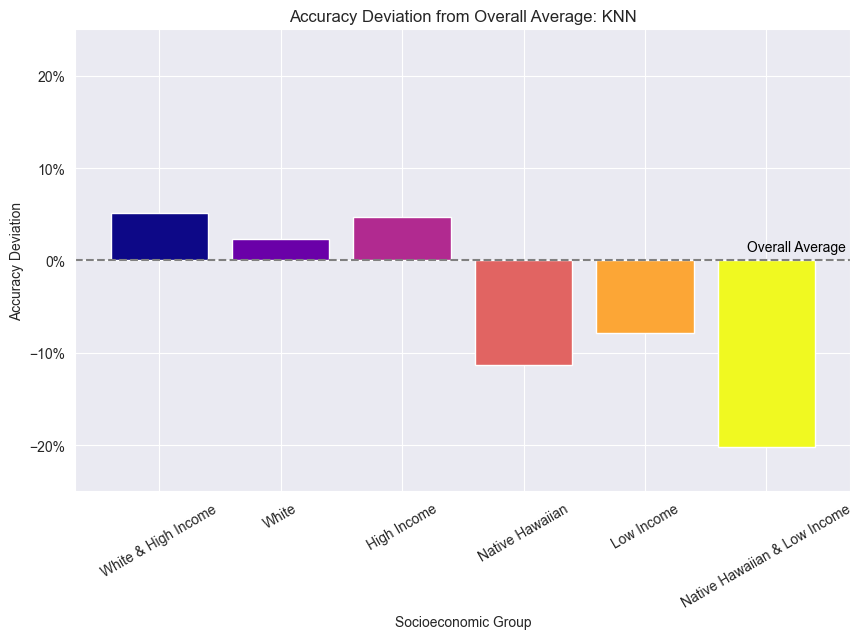

In [25]:
accuracies = [
    white_high_income_acc - overall_average_acc,
    white_acc - overall_average_acc,
    high_income_acc - overall_average_acc,
    hawaiian_acc - overall_average_acc,
    low_income_acc - overall_average_acc,
    hawaiian_low_income_acc - overall_average_acc
]
labels = [
    'White & High Income',
    'White',
    'High Income',
    'Native Hawaiian',
    'Low Income',
    'Native Hawaiian & Low Income'
]

# Create bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(accuracies)))
plt.bar(labels, accuracies, color=colors)
plt.xlabel('Socioeconomic Group')
plt.ylabel('Accuracy Deviation')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Accuracy Deviation from Overall Average: KNN')
plt.ylim(-0.25, 0.25)  # Set y-axis limits
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
# Plot a horizontal line at 0
plt.axhline(0, color='gray', linestyle='--')
plt.text(len(labels) - 0.35, 0.01, 'Overall Average', color='black', ha='right')
plt.show()

- The visualization highlights a notable disparity in classification accuracy, particularly evident in the Native Hawaiian & low-income intersectional group, which exhibits a significant deviation from the overall average accuracy.
- The synergy between being White and having a high income did not result in a substantial increase in accuracy. Instead, it appears that only the intersections with lower socioeconomic status contribute to further discrimination.
- The observed patterns underscore the importance of addressing intersectional discrimination and developing targeted interventions to ensure equitable outcomes across diverse socioeconomic groups.

### Model 2: Logistic Regression

In [26]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

y_pred_lr = logistic_regression_model.predict(X_test)

accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(f'Accuracy of Logistic Regression model: {accuracy_lr}')

metrics.roc_auc_score(y_test, y_pred_lr), metrics.accuracy_score(y_test, y_pred_lr)

Accuracy of Logistic Regression model: 0.9269369000500433


(0.5, 0.9269369000500433)

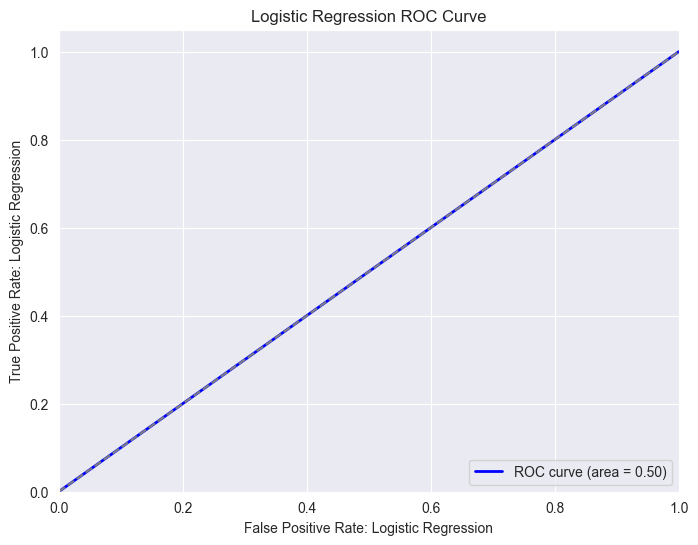

In [27]:
#ROC for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate: Logistic Regression')
plt.ylabel('True Positive Rate: Logistic Regression')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
#accuracy for logistic regression
cond = (X_test["_RACE"] == 6)  # Native Hawaiian
hawaiian_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

cond = (X_test["_INCOMG"] == 0)  # Second lowest income group, because the lowest group had no intersection
low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

cond = (X_test["_RACE"] == 6) & (X_test["_INCOMG"] == 0)  # Intersection of Native Hawaiian & low income
hawaiian_low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

cond = (X_test["_RACE"] == 8)  # White
white_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

cond = (X_test["_INCOMG"] == 3)  # Highest income group
high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

cond = (X_test["_RACE"] == 8) & (X_test["_INCOMG"] == 3)  # Intersection of White & Highest income group
white_high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_lr[cond])

overall_average_acc = metrics.accuracy_score(y_test, y_pred_lr)
print(f"{overall_average_acc = :.2f}")
print(f"{hawaiian_acc = :.2f}")
print(f"{low_income_acc = :.2f}")
print(f"{hawaiian_low_income_acc = :.2f}")
print(f"{white_high_income_acc = :.2f}")
print(f"{white_acc = :.2f}")
print(f"{high_income_acc = :.2f}")

overall_average_acc = 0.93
hawaiian_acc = 0.82
low_income_acc = 0.86
hawaiian_low_income_acc = 0.72
white_high_income_acc = 0.98
white_acc = 0.95
high_income_acc = 0.97


The bar graph showcases the variances in the predictive accuracy of the logistic regression model when applied to different demographic and socioeconomic subgroups within the test data. It indicates that the model's performance is not uniform across these subgroups. Notably:

- The intersection of the White race and high income category indicates a minor positive deviation from the overall average accuracy, suggesting that this subgroup is slightly better predicted by the model than the average across all groups.
- The accuracy for the White subgroup alone is close to the baseline, indicating that race alone, without the consideration of income, does not lead to significant disparities in model accuracy for this demographic.
- On the other end of the spectrum, the Native Hawaiian group shows a negative deviation, implying a lower accuracy than the overall average, highlighting a potential area where the model's predictive capability diminishes.
- The subgroup representing low income, irrespective of race, also experiences a negative deviation, indicating a reduced accuracy in model predictions for individuals within this economic bracket.


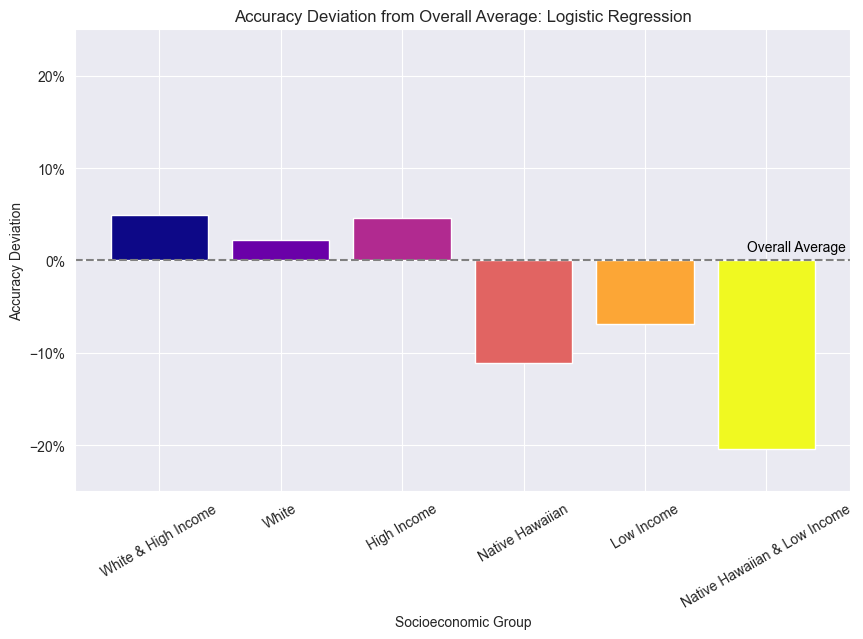

In [29]:
accuracies = [
    white_high_income_acc - overall_average_acc,
    white_acc - overall_average_acc,
    high_income_acc - overall_average_acc,
    hawaiian_acc - overall_average_acc,
    low_income_acc - overall_average_acc,
    hawaiian_low_income_acc - overall_average_acc
]
labels = [
    'White & High Income',
    'White',
    'High Income',
    'Native Hawaiian',
    'Low Income',
    'Native Hawaiian & Low Income'
]

# Create bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(accuracies)))
plt.bar(labels, accuracies, color=colors)
plt.xlabel('Socioeconomic Group')
plt.ylabel('Accuracy Deviation')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Accuracy Deviation from Overall Average: Logistic Regression')
plt.ylim(-0.25, 0.25)  # Set y-axis limits
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
# Plot a horizontal line at 0
plt.axhline(0, color='gray', linestyle='--')
plt.text(len(labels) - 0.35, 0.01, 'Overall Average', color='black', ha='right')
plt.show()

### Model 3: Random Forest

In [30]:
from sklearn.utils import resample

def downsample(n, X_train, y_train):
    train_data = pd.concat([X_train, y_train], axis=1)

    # Separate majority and minority classes
    majority_class = train_data[train_data["HLTHPLN1"] == 1]
    minority_class = train_data[train_data["HLTHPLN1"] == 0]
    
    # Downsample majority class
    majority_downsampled = resample(majority_class, replace=False, n_samples=n*len(minority_class), random_state=0)
    
    # Combine minority class with downsampled majority class
    resampled_train_data = pd.concat([majority_downsampled, minority_class])
    
    # Separate X_resampled and y_resampled
    X_train_resampled = resampled_train_data.drop("HLTHPLN1", axis=1)
    y_train_resampled = resampled_train_data["HLTHPLN1"]
    
    return X_train_resampled, y_train_resampled

X_train, y_train = downsample(3, X_train, y_train)

In [31]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10],  
    'min_samples_split': [2, 5]  
}

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred_rf = grid_search.predict(X_test)

# Calculate the accuracy of the best Random Forest model
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of the best Random Forest model: {accuracy_rf}')

# Calculate ROC AUC score for the best Random Forest model
roc_auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
print(f'ROC AUC score for the best Random Forest model: {roc_auc_rf}')

Best parameters found:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of the best Random Forest model: 0.897957326782221
ROC AUC score for the best Random Forest model: 0.5976511853555302


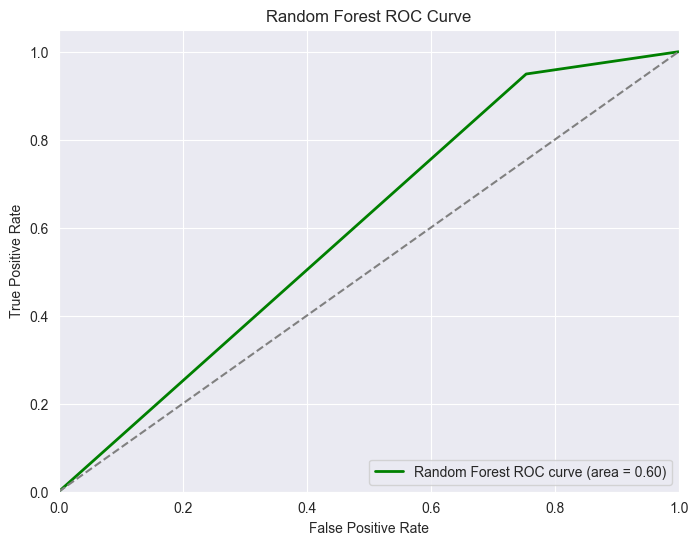

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate ROC curve values for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [33]:
# Assuming y_pred_rf contains predictions from the Random Forest model

cond = (X_test["_RACE"] == 6)  # Native Hawaiian
hawaiian_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

cond = (X_test["_INCOMG"] == 0)  # Second lowest income group, because the lowest group had no intersection
low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

cond = (X_test["_RACE"] == 6) & (X_test["_INCOMG"] == 0)  # Intersection of Native Hawaiian & low income
hawaiian_low_income_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

cond = (X_test["_RACE"] == 8)  # White
white_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

cond = (X_test["_INCOMG"] == 3)  # Highest income group
high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

cond = (X_test["_RACE"] == 8) & (X_test["_INCOMG"] == 3)  # Intersection of White & Highest income group
white_high_income_acc = metrics.accuracy_score(y_test[cond], y_pred_rf[cond])

overall_average_acc = metrics.accuracy_score(y_test, y_pred_rf)
print(f"Overall Average Accuracy: {overall_average_acc:.2f}")
print(f"Hawaiian Accuracy: {hawaiian_acc:.2f}")
print(f"Low Income Group Accuracy: {low_income_acc:.2f}")
print(f"Hawaiian & Low Income Group Accuracy: {hawaiian_low_income_acc:.2f}")
print(f"White & High Income Group Accuracy: {white_high_income_acc:.2f}")
print(f"White Accuracy: {white_acc:.2f}")
print(f"High Income Group Accuracy: {high_income_acc:.2f}")


Overall Average Accuracy: 0.90
Hawaiian Accuracy: 0.74
Low Income Group Accuracy: 0.81
Hawaiian & Low Income Group Accuracy: 0.60
White & High Income Group Accuracy: 0.98
White Accuracy: 0.95
High Income Group Accuracy: 0.97


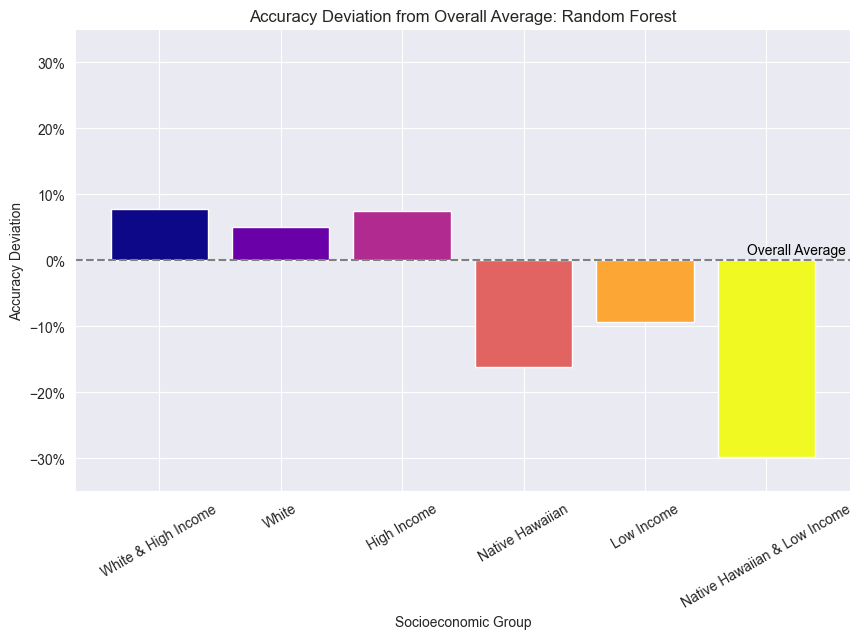

In [34]:
accuracies = [
    white_high_income_acc - overall_average_acc,
    white_acc - overall_average_acc,
    high_income_acc - overall_average_acc,
    hawaiian_acc - overall_average_acc,
    low_income_acc - overall_average_acc,
    hawaiian_low_income_acc - overall_average_acc
]
labels = [
    'White & High Income',
    'White',
    'High Income',
    'Native Hawaiian',
    'Low Income',
    'Native Hawaiian & Low Income'
]

# Create bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(accuracies)))
plt.bar(labels, accuracies, color=colors)
plt.xlabel('Socioeconomic Group')
plt.ylabel('Accuracy Deviation')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Accuracy Deviation from Overall Average: Random Forest')
plt.ylim(-0.35, 0.35)  # Set y-axis limits
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
# Plot a horizontal line at 0
plt.axhline(0, color='gray', linestyle='--')
plt.text(len(labels) - 0.35, 0.01, 'Overall Average', color='black', ha='right')
plt.show()

### Model 4: Naive Bayes Classifier

In [35]:
# Gaussian NB Classifer
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

accuracy_nb = metrics.accuracy_score(y_test, nb_y_pred)

print(f'Accuracy of Naive Bayes model: {accuracy_nb}')

metrics.roc_auc_score(y_test, nb_y_pred), \
  metrics.accuracy_score(y_test, nb_y_pred)

Accuracy of Naive Bayes model: 0.8863450252490788


(0.5387609348379161, 0.8863450252490788)

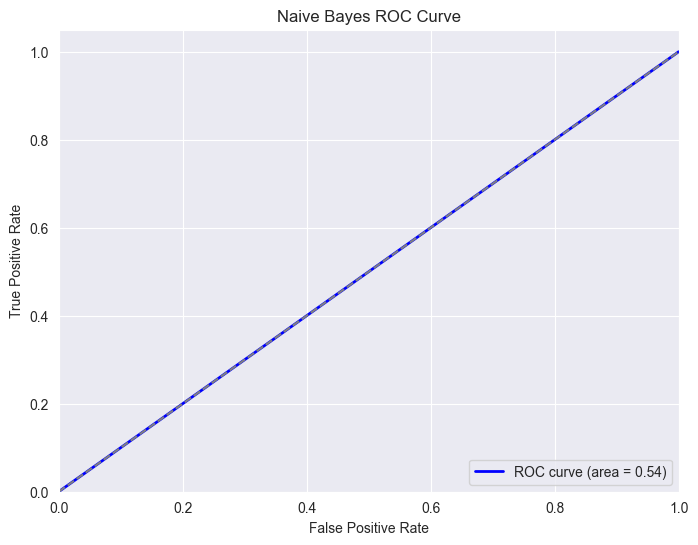

In [36]:
# ROC: NB
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, nb_y_pred)
roc_auc = auc(fpr_nb, tpr_nb)

# Plot ROC curve: NB
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, \
  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
# Accuracy for NB

# Native Hawaiian
cond = (X_test["_RACE"] == 6)  
hawaiian_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

# Second lowest income group
cond = (X_test["_INCOMG"] == 0) 
low_income_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

# Intersection of Native Hawaiian & low income
cond = (X_test["_RACE"] == 6) & (X_test["_INCOMG"] == 0) 
hawaiian_low_income_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

# White
cond = (X_test["_RACE"] == 8) 
white_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

# Highest income group
cond = (X_test["_INCOMG"] == 3) 
high_income_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

# Intersection of White & Highest income group
cond = (X_test["_RACE"] == 8) & (X_test["_INCOMG"] == 3) 
white_high_income_acc = metrics.accuracy_score(y_test[cond], nb_y_pred[cond])

overall_average_acc = metrics.accuracy_score(y_test, nb_y_pred)
print(f"{overall_average_acc = :.2f}")
print(f"{hawaiian_acc = :.2f}")
print(f"{low_income_acc = :.2f}")
print(f"{hawaiian_low_income_acc = :.2f}")
print(f"{white_high_income_acc = :.2f}")
print(f"{white_acc = :.2f}")
print(f"{high_income_acc = :.2f}")

overall_average_acc = 0.89
hawaiian_acc = 0.82
low_income_acc = 0.73
hawaiian_low_income_acc = 0.72
white_high_income_acc = 0.98
white_acc = 0.95
high_income_acc = 0.95


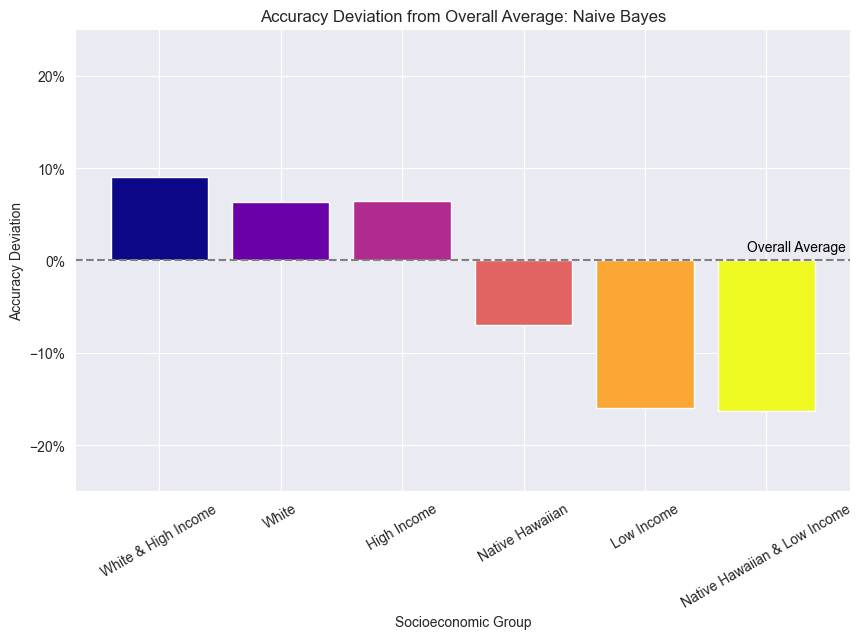

In [38]:
# Plotting accuracies

accuracies = [
    white_high_income_acc - overall_average_acc,
    white_acc - overall_average_acc,
    high_income_acc - overall_average_acc,
    hawaiian_acc - overall_average_acc,
    low_income_acc - overall_average_acc,
    hawaiian_low_income_acc - overall_average_acc
]
labels = [
    'White & High Income',
    'White',
    'High Income',
    'Native Hawaiian',
    'Low Income',
    'Native Hawaiian & Low Income'
]

# Create bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 1, len(accuracies)))
plt.bar(labels, accuracies, color=colors)
plt.xlabel('Socioeconomic Group')
plt.ylabel('Accuracy Deviation')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Accuracy Deviation from Overall Average: Naive Bayes')
plt.ylim(-0.25, 0.25)  # Set y-axis limits
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
# Plot a horizontal line at 0
plt.axhline(0, color='gray', linestyle='--')
plt.text(len(labels) - 0.35, 0.01, 'Overall Average', color='black', ha='right')
plt.show()

## 5. Results

When looking at the KNN classifier results, we see that there are significant accuracy discrepancies worth exploring. When looking at the accuracy deviation from the overall average for these groups and their intersections, we see that while the accuracy deviation is worst for the Native Hawaiian and low income intersection, when looking at the Native Hawaiian population and low income population individually, we see that the accuracy deviation is worse for the Native Hawaiian population than the low income population. This leads us to hypothesize that race plays a higher role in impacting the likelihood of an individual receiving healthcare insurance than income status. We also believe it to be worth noting that though those who reported being Hispanic were less likely to have access to healthcare insurance than those who reported being Native Hawaaian, the Native Hawaiian and low income group was most disadvantaged, which further justifies our intentions to look at intersectionality between race and income. We also see that while there is 84.17% availablity for Native Hawaiians and 86.06% availability for those reported low income, there is a 72.13% availability for low income Native Hawaiians which also justifies our research. In terms of which intersectional groups are least likely to receive healthcare insurance, we hypothesize that low income individuals who identify as Native Hawaiian or Hispanic are most likely to be disadvantaged. However, we realize now that there is a biased distribution in our data that leads us to reconsider our models and the testing sample we are using. There is a significantly larger portion of our sample (upwards of 90%) where the instances have access to healthcare, and not many did not have access to healthcare. We need to debias our data, however, we believe that for the data we used, the model performed satisfactorily. In looking at the logistic regression model and the ROC curve, we see the performance was very slightly worse, but the results were nearly the same as the first model. We realize that because our model is outputting a binary classification and because our data was significantly biased (in that most of the instances had access to healthcare), these models were almost always predicting that an individual would have access to healthcare, so the performance is as expected (once again), but needs improvement with regard to the training data we use. For the random forest model and the ROC curve, we see the performance was better than the performance for the KNN classifier model and logistic regression model. Once again, based on the data that we used (that requires more extensive debiasing to be usable), the model performance is as expected. When looking at our fourth model, the Naive Bayes classification model, it also performed as expected based on the data we used and performed very similarly to the first two models. 

After having built our models and seeing that they all performed very similarly, we realized that the data we are using carries significant biases that make reaching meaningful conclusions difficult. While the results pointed us in the direction of seeing that accuracy is a significant discrepancy between different intersectional groups, we realized that we must debias the data before using these results to make conclusions about the models’ performances. To fix this issue, we will try downsampling and debiasing the data. With over 93% of the instances being of people who did end up having access to healthcare insurance, our models are trained to almost always predict that an individual will have access to healthcare, which does not lead us to make any meaningful conclusions regarding their accuracy or performance for different intersectional groups. If we see that we cannot meaningfully debias this dataset, we intend to find a new and more representative dataset where we have more instances of people who did not have access to healthcare insurance. Especially because all of our models were very close to random guessing (based on the derived ROC curves), we know we must improve the data.

We also believe that limiting our exploration to simply looking at race and income status might make our models too simple and disregards other necessary information that may make more meaningful our analysis and may make more meaningful any conclusions regarding the impact of including these factors in training the models. This is why we may also, in future steps, reconsider what columns we may keep for training the models.

For future steps, we may also replace our logistic regression model and look at more meaningful models. As of now, the model is always guessing that a person will be given healthcare insurance, but we are not yet sure if this can be attributed to our biased data or to the model being ineffective.


## 6. Contribution Notes

- Bin: summary statistics, naive bayes model, KNN model, results.
- Wei: data cleansing, summary statistic, random forest model.
- Divya: part three (research question…), part five (results…), summary statistic.
- Likita: logistic regression model.

## 7. Citations

- [1] CDC - BRFSS - Survey Data & Documentation. Centers for Disease Control and Prevention, 2023. https://www.cdc.gov/brfss/data_documentation/index.htm. 
